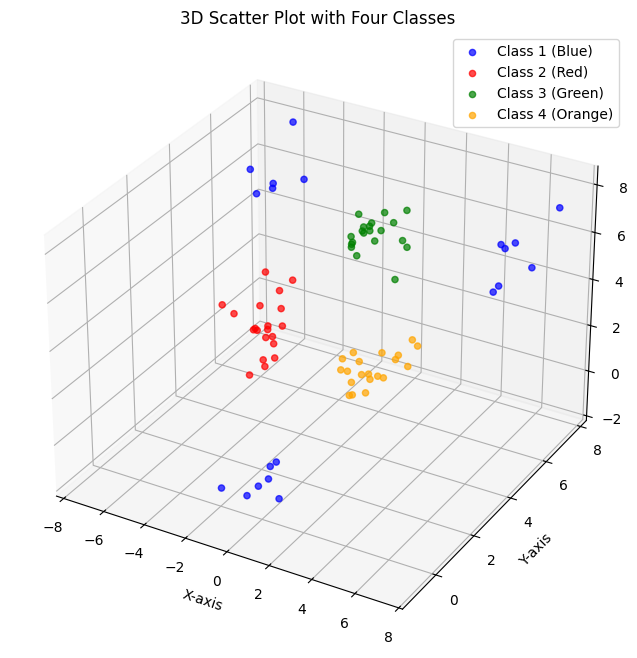

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import ttk

# Generate DataFrames for different classes
mean_class11 = [0, 0, 0]  # Mean for class 1 (Blue)
cov_class11 = [[0.5, 0., 0.], [0., 0.5, 0.], [0., 0., 0.5]]  # Covariance for class 1
samples_class11 = np.random.multivariate_normal(mean_class11, cov_class11, size=7)
df_class11 = pd.DataFrame({'X': np.round(samples_class11[:, 0], 2), 'Y': np.round(samples_class11[:, 1], 2),
                           'Z': np.round(samples_class11[:, 2], 2), 'Class': '1'})

mean_class21 = [6, 6, 6]  # Mean for class 1 (Blue)
samples_class21 = np.random.multivariate_normal(mean_class21, cov_class11, size=7)
df_class21 = pd.DataFrame({'X': np.round(samples_class21[:, 0], 2), 'Y': np.round(samples_class21[:, 1], 2),
                           'Z': np.round(samples_class21[:, 2], 2), 'Class': '1'})

mean_class31 = [-6, 6, 6]  # Mean for class 1 (Blue)
samples_class31 = np.random.multivariate_normal(mean_class31, cov_class11, size=6)
df_class31 = pd.DataFrame({'X': np.round(samples_class31[:, 0], 2), 'Y': np.round(samples_class31[:, 1], 2),
                           'Z': np.round(samples_class31[:, 2], 2), 'Class': '1'})

df_class1 = pd.concat([df_class11, df_class21, df_class31], ignore_index=True)

mean_class2 = [-3, 3, 3]  # Mean for class 2 (Red)
samples_class2 = np.random.multivariate_normal(mean_class2, cov_class11, size=20)
df_class2 = pd.DataFrame({'X': np.round(samples_class2[:, 0], 2), 'Y': np.round(samples_class2[:, 1], 2),
                          'Z': np.round(samples_class2[:, 2], 2), 'Class': '2'})

mean_class3 = [0, 6, 6]  # Mean for class 3 (Green)
samples_class3 = np.random.multivariate_normal(mean_class3, cov_class11, size=20)
df_class3 = pd.DataFrame({'X': np.round(samples_class3[:, 0], 2), 'Y': np.round(samples_class3[:, 1], 2),
                          'Z': np.round(samples_class3[:, 2], 2), 'Class': '3'})

mean_class4 = [0, 6, 0]  # Mean for class 4 (Orange)
samples_class4 = np.random.multivariate_normal(mean_class4, cov_class11, size=20)
df_class4 = pd.DataFrame({'X': np.round(samples_class4[:, 0], 2), 'Y': np.round(samples_class4[:, 1], 2),
                          'Z': np.round(samples_class4[:, 2], 2), 'Class': '4'})

# Merge the DataFrames into a single DataFrame
df_all_classes = pd.concat([df_class1, df_class2, df_class3, df_class4], ignore_index=True)

# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for merged classes
ax.scatter(df_class1['X'], df_class1['Y'], df_class1['Z'], c='blue', label='Class 1 (Blue)', alpha=0.7)
ax.scatter(df_class2['X'], df_class2['Y'], df_class2['Z'], c='red', label='Class 2 (Red)', alpha=0.7)
ax.scatter(df_class3['X'], df_class3['Y'], df_class3['Z'], c='green', label='Class 3 (Green)', alpha=0.7)
ax.scatter(df_class4['X'], df_class4['Y'], df_class4['Z'], c='orange', label='Class 4 (Orange)', alpha=0.7)

ax.set_title('3D Scatter Plot with Four Classes')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

plt.show()

# Save each DataFrame to CSV files
df_class1.to_csv('class1_data.csv', index=False)
df_class2.to_csv('class2_data.csv', index=False)
df_class3.to_csv('class3_data.csv', index=False)
df_class4.to_csv('class4_data.csv', index=False)
df_all_classes.to_csv('all_classes_data.csv', index=False)

# Function to display DataFrame in a new window
def display_dataframe(df, title):
    window = tk.Tk()
    window.title(title)
    
    frame = ttk.Frame(window)
    frame.pack(fill='both', expand=True)

    # Create Treeview to display the DataFrame
    tree = ttk.Treeview(frame, show='headings')
    tree.pack(fill='both', expand=True)

    # Define the columns based on the DataFrame
    tree["columns"] = list(df.columns)
    for col in df.columns:
        tree.heading(col, text=col)
        tree.column(col, anchor="center")

    # Insert the DataFrame rows into the Treeview
    for _, row in df.iterrows():
        tree.insert("", "end", values=list(row))

    # Add scrollbar
    scrollbar = ttk.Scrollbar(frame, orient="vertical", command=tree.yview)
    tree.configure(yscroll=scrollbar.set)
    scrollbar.pack(side="right", fill="y")

    window.mainloop()


# Display each DataFrame in a new window
display_dataframe(df_class1, "Class 1 DataFrame")
display_dataframe(df_class2, "Class 2 DataFrame")
display_dataframe(df_class3, "Class 3 DataFrame")
display_dataframe(df_class4, "Class 4 DataFrame")
display_dataframe(df_all_classes, "Merged DataFrame (All Classes)")
